# England and Wales - Price Paid Housing data for 2018

A data dive into a publicly available housing dataset downloaded from https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads published by the UK Government (HM Land Registry) in January 2019.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib.cm

import seaborn as sns

sns.set(style="white", color_codes=True)

%matplotlib inline


__author__ = 'Ken Williams'

# Print Header Info.
import time,getpass,socket
from datetime import datetime

print("Timestamp:", str(datetime.now()))
print("Created by: ", __author__, " on ", socket.gethostname())
print('Pandas version: ' + pd.__version__)
print('Matplotlib version: ' + matplotlib.__version__)
print('Seaborn version: ' + sns.__version__)

Timestamp: 2019-02-03 15:26:49.489216
Created by:  Ken Williams  on  harlow
Pandas version: 0.24.0
Matplotlib version: 3.0.2
Seaborn version: 0.9.0


### Load the Data. 

In [2]:
df = pd.read_csv("data/pp-2018.csv", header=None)
df_original = df            # We need to keep a copy of the orginal data (see Warning note further down)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,{7E86B6FB-B772-458C-E053-6B04A8C0C84C},350000,2018-11-30 00:00,S80 1JQ,O,N,F,28,NaN,BRIDGE STREET,NaN,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,B,A
1,{7E86B6FB-B773-458C-E053-6B04A8C0C84C},255000,2018-12-05 00:00,NG2 2JR,D,N,F,1,NaN,ARKWRIGHT STREET,NaN,NOTTINGHAM,CITY OF NOTTINGHAM,CITY OF NOTTINGHAM,B,A
2,{7E86B6FB-B774-458C-E053-6B04A8C0C84C},88000,2018-12-14 00:00,NG4 3AZ,F,N,L,2,NaN,MANOR GREEN,CARLTON,NOTTINGHAM,GEDLING,NOTTINGHAMSHIRE,B,A
3,{7E86B6FB-B775-458C-E053-6B04A8C0C84C},131000,2018-11-22 00:00,NG9 1QP,S,N,F,11,NaN,ALFORD CLOSE,BEESTON,NOTTINGHAM,BROXTOWE,NOTTINGHAMSHIRE,B,A
4,{7E86B6FB-B776-458C-E053-6B04A8C0C84C},115000,2018-08-03 00:00,NG18 2RU,T,N,F,42,NaN,CAVENDISH STREET,NaN,MANSFIELD,MANSFIELD,NOTTINGHAMSHIRE,B,A


The shape of the dataset tells us how many rows and features the set has. This dataset contains details of 904147 property sales with 16 features for each sale. 

In [3]:
df.shape

(904147, 16)

The original dataset has no column headers, however these are described on the web-site page where the data was downloaded from. We can add column headers now. Most of the columns are self-explanatory. They <tt>type</tt> column describes the property type, one of 'F' (flat), 'D' (detatched house), 'S' (semi-detatched house), 'T' (terraced house), or 'O' (other). 

In [4]:
df.columns = ['id', 'price', 'transfer_date', 'postcode', 'type', 'new', 'duration',
            'paon', 'saon', 'street', 'locality', 'city', 'district', 'county', 'ppd_cat', 'record_status']
df.head()

,id,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status
0,{7E86B6FB-B772-458C-E053-6B04A8C0C84C},350000,2018-11-30 00:00,S80 1JQ,O,N,F,28,NaN,BRIDGE STREET,NaN,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,B,A
1,{7E86B6FB-B773-458C-E053-6B04A8C0C84C},255000,2018-12-05 00:00,NG2 2JR,D,N,F,1,NaN,ARKWRIGHT STREET,NaN,NOTTINGHAM,CITY OF NOTTINGHAM,CITY OF NOTTINGHAM,B,A
2,{7E86B6FB-B774-458C-E053-6B04A8C0C84C},88000,2018-12-14 00:00,NG4 3AZ,F,N,L,2,NaN,MANOR GREEN,CARLTON,NOTTINGHAM,GEDLING,NOTTINGHAMSHIRE,B,A
3,{7E86B6FB-B775-458C-E053-6B04A8C0C84C},131000,2018-11-22 00:00,NG9 1QP,S,N,F,11,NaN,ALFORD CLOSE,BEESTON,NOTTINGHAM,BROXTOWE,NOTTINGHAMSHIRE,B,A
4,{7E86B6FB-B776-458C-E053-6B04A8C0C84C},115000,2018-08-03 00:00,NG18 2RU,T,N,F,42,NaN,CAVENDISH STREET,NaN,MANSFIELD,MANSFIELD,NOTTINGHAMSHIRE,B,A


We will not need the <tt>id</tt> column in this data analysis so we remove it.

In [5]:
id_col = df.pop('id')
df.head()

,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status
0,350000,2018-11-30 00:00,S80 1JQ,O,N,F,28,NaN,BRIDGE STREET,NaN,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,B,A
1,255000,2018-12-05 00:00,NG2 2JR,D,N,F,1,NaN,ARKWRIGHT STREET,NaN,NOTTINGHAM,CITY OF NOTTINGHAM,CITY OF NOTTINGHAM,B,A
2,88000,2018-12-14 00:00,NG4 3AZ,F,N,L,2,NaN,MANOR GREEN,CARLTON,NOTTINGHAM,GEDLING,NOTTINGHAMSHIRE,B,A
3,131000,2018-11-22 00:00,NG9 1QP,S,N,F,11,NaN,ALFORD CLOSE,BEESTON,NOTTINGHAM,BROXTOWE,NOTTINGHAMSHIRE,B,A
4,115000,2018-08-03 00:00,NG18 2RU,T,N,F,42,NaN,CAVENDISH STREET,NaN,MANSFIELD,MANSFIELD,NOTTINGHAMSHIRE,B,A


Let's just check the data type of each column. 

In [6]:
for col in df.columns:
    print('{0} : {1}'.format(col, df[col].dtype))

price : int64
transfer_date : object
postcode : object
type : object
new : object
duration : object
paon : object
saon : object
street : object
locality : object
city : object
district : object
county : object
ppd_cat : object
record_status : object


And while we are checking things, let's also check the dataset contains the property types we expect, nothing more and nothing less. 

In [7]:
# Get list of all property types we have
property_types = df.type.unique()
property_types

array(['O', 'D', 'F', 'S', 'T'], dtype=object)

Next, we convert the new-build properties (i.e. the <tt>new</tt>) column from 'Y'/'N' to binary numbers. This simply makes the data a bit easier to work with.

In [8]:
# Convert a binary field to 1's and 0's to make it easier to work with.
def convert_binary(x, val1, val2):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    else:
        return np.nan
    

In [9]:
df.new = df.new.apply(convert_binary, args=('Y', 'N'))
df.head()

,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status
0,350000,2018-11-30 00:00,S80 1JQ,O,0,F,28,NaN,BRIDGE STREET,NaN,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,B,A
1,255000,2018-12-05 00:00,NG2 2JR,D,0,F,1,NaN,ARKWRIGHT STREET,NaN,NOTTINGHAM,CITY OF NOTTINGHAM,CITY OF NOTTINGHAM,B,A
2,88000,2018-12-14 00:00,NG4 3AZ,F,0,L,2,NaN,MANOR GREEN,CARLTON,NOTTINGHAM,GEDLING,NOTTINGHAMSHIRE,B,A
3,131000,2018-11-22 00:00,NG9 1QP,S,0,F,11,NaN,ALFORD CLOSE,BEESTON,NOTTINGHAM,BROXTOWE,NOTTINGHAMSHIRE,B,A
4,115000,2018-08-03 00:00,NG18 2RU,T,0,F,42,NaN,CAVENDISH STREET,NaN,MANSFIELD,MANSFIELD,NOTTINGHAMSHIRE,B,A


Let's see some summary statistics for the dataset.

In [10]:
df.describe()

,price,new
count,9.041470e+05,904147.000000
mean,3.479034e+05,0.101440
std,1.895756e+06,0.301911
min,1.000000e+00,0.000000
25%,1.450000e+05,0.000000
50%,2.299500e+05,0.000000
75%,3.550000e+05,0.000000
max,5.692000e+08,1.000000


Let's see how many properties and new build properties were sold in 2018, and new builds as a percentage.   

In [11]:
total_new = df.new.sum()
percentage_new = total_new / len(df) * 100
print('Total properties: {0} | Total new build: {1}  | Percentage new: {2:,.2f}'.format(len(df), total_new, percentage_new))

Total properties: 904147 | Total new build: 91717  | Percentage new: 10.14


In [12]:
sum_total = 0
for pt in property_types:
    num = len(df[df.type == pt])
    sum_total += num
    print('Total properties of type: {0} is {1}'.format(pt, num))
print('Total properties all types: {0}'.format(sum_total))

assert sum_total == len(df), "ERROR: Totals should be equal." 


Total properties of type: O is 53926
Total properties of type: D is 205584
Total properties of type: F is 154224
Total properties of type: S is 240948
Total properties of type: T is 249465
Total properties all types: 904147


Let us see the distribution of property prices paid in 2018. To keep the graph readable we remove any extremely high 'outlier' price properties. In this case we define an outlier price as being over 3 standard-deviations above the mean paid price.    

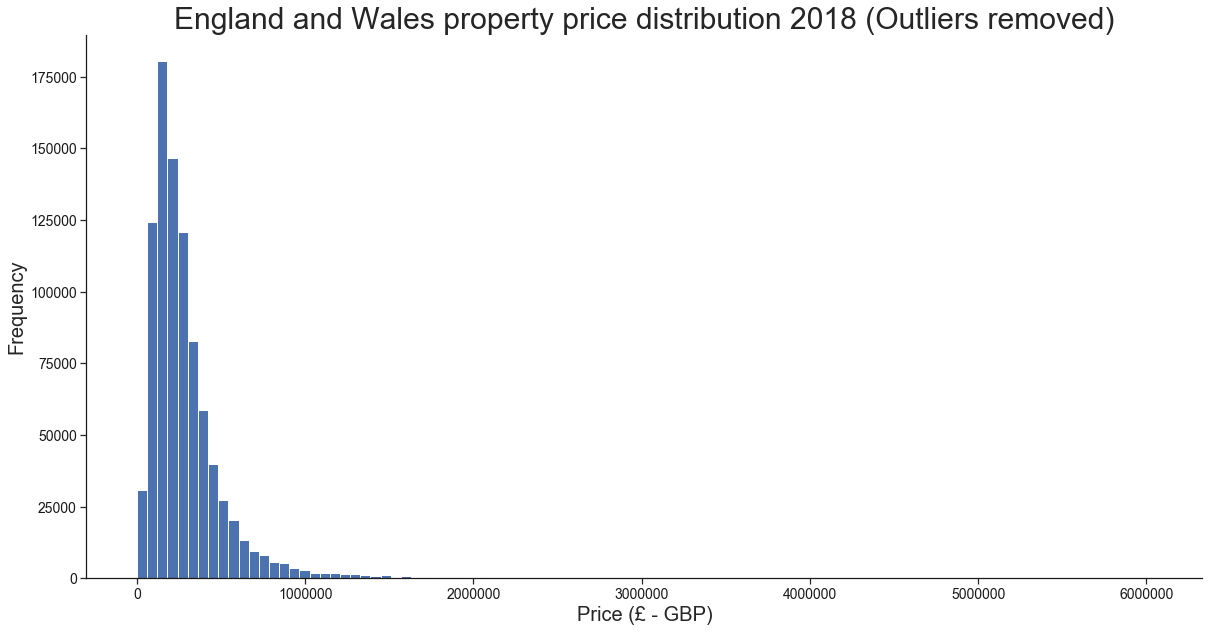

In [13]:
no_outliers = df[np.abs(df.price-df.price.mean())<=(3*df.price.std())]

fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
ax.spines['left'].set_color('#1a1a1a')
ax.spines['bottom'].set_color('#1a1a1a')

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()

plt.xticks(fontsize=14, color='#1a1a1a')  
plt.yticks(fontsize=14, color='#1a1a1a')

plt.title('England and Wales property price distribution 2018 (Outliers removed)', fontsize=30)
plt.xlabel('Price (£ - GBP)', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

plt.hist(no_outliers.price, bins=100);

### Where are new properties being built ? 

Property investors ae always interested in newly built properties. Let us see if we can find out where these properties were being built in 2018. We can use the postcode to find the approximate longitude and latitude of the property which is accurate enough for us to plot some maps.

Postcode and lat/lon data obtained from https://www.doogal.co.uk/files/postcodes.zip

In [14]:
postcodes = pd.read_csv('data/postcodes.csv', usecols=['Postcode', 'Latitude', 'Longitude'])
postcodes.columns = ['postcode', 'lat', 'lon']
postcodes.head()

,postcode,lat,lon
0,AB1 0AA,57.101474,-2.242851
1,AB1 0AB,57.102554,-2.246308
2,AB1 0AD,57.100556,-2.248342
3,AB1 0AE,57.084444,-2.255708
4,AB1 0AF,57.096656,-2.258102


In [15]:
df = df.merge(postcodes, on='postcode')
df.head()

,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status,lat,lon
0,350000,2018-11-30 00:00,S80 1JQ,O,0,F,28,NaN,BRIDGE STREET,NaN,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE,B,A,53.304563,-1.124819
1,255000,2018-12-05 00:00,NG2 2JR,D,0,F,1,NaN,ARKWRIGHT STREET,NaN,NOTTINGHAM,CITY OF NOTTINGHAM,CITY OF NOTTINGHAM,B,A,52.946230,-1.146651
2,88000,2018-12-14 00:00,NG4 3AZ,F,0,L,2,NaN,MANOR GREEN,CARLTON,NOTTINGHAM,GEDLING,NOTTINGHAMSHIRE,B,A,52.968381,-1.081608
3,131000,2018-11-22 00:00,NG9 1QP,S,0,F,11,NaN,ALFORD CLOSE,BEESTON,NOTTINGHAM,BROXTOWE,NOTTINGHAMSHIRE,B,A,52.921339,-1.205163
4,160000,2018-04-06 00:00,NG9 1QP,S,0,F,28,NaN,ALFORD CLOSE,BEESTON,NOTTINGHAM,BROXTOWE,NOTTINGHAMSHIRE,A,A,52.921339,-1.205163


In [16]:
len(df)

898323

<u>Warning!</u> It has been noticed that when we merge the postcode data with the housing sales data we lose some of the housing data. Instead of having 904147 we now only have 898323 records, a loss of 5824 sales records. I'm guessing that some of the postcodes in the postcode data may be formatted slightly differently to the housing sales data, and therefore do not match-up during the merge. Also, maybe there have been postcode changes which occurred after a sale was recorded. On the basis that we only lose a small percentage of our data, I have left this for now and intend to investigate at a later date.  

We now use the <tt>new</tt> column to extract the new build properties from the dataset. Remember - these are only newly built properties which have been sold, there may be other nearby flats still available!

In [17]:
# Identify new build properties by postal area.
new = df[df.new == 1]
new_areas = pd.DataFrame(new.groupby(new.postcode.str.extract(r'(\D+)')[0]).postcode.count())
new_areas.columns = ['count']
new_areas.index.names = ['area']
new_areas = new_areas.reset_index()
print(new_areas.shape)
new_areas.head(10)

(105, 2)


,area,count
0,AL,267
1,B,2319
2,BA,839
3,BB,450
4,BD,616
5,BH,561
6,BL,180
7,BN,550
8,BR,285
9,BS,1424


Now, let's find out where most of the new builds occurred. We do this by taking a straight count of new build properties sold within each postcode. We print the top 10 by count of new properties sold. (Remember, this is for <i>all</i> property types) 

In [18]:
# Get most new builds by postcode
df_newbuilds = df[df.new == 1]
df_newbuilds = pd.DataFrame(df_newbuilds.groupby(df_newbuilds.postcode).postcode.count())
df_newbuilds.columns = ['count']
df_newbuilds.index.names = ['postcode']
df_newbuilds = df_newbuilds.sort_values(by=['count'], ascending=False)
df_newbuilds = df_newbuilds.reset_index()
df_newbuilds.head(10)

,postcode,count
0,L5 3AA,192
1,SS2 6EB,180
2,LU1 5FT,166
3,EX34 8PF,144
4,CH1 3GW,121
5,W6 0BT,106
6,E10 7JQ,102
7,B15 2DS,96
8,E15 1DS,93
9,L3 3BQ,91


We can see that 192 newly build properties were sold within the 'L5 3AA' postcode in 2018. More than anywhere else in England or Wales. 

Let's drill down into a bit more detail. We want to know where are the highest prices being paid for new build properties, and for what types of property. So, let's get the average price paid for each newly built property, by type, and within each postcode. We want to print the top 50 by average price. Note, that some of these average figures are somewhat skewed by 1 expensive sale, so we also print the number of properties sold (<tt>num_sales</tt>) just to give an indication of how many properties were actually sold to give the average price figure. 

In [19]:
# Get average price for each type of property within postcode
df_newprices = df[df.new == 1]
df_newprices = df_newprices.groupby(['postcode','type','street','city','county']) \
       .agg({'price':'mean', 'postcode':'count'}) \
       .rename(columns={'postcode':'num_sales', 'price':'average_price'}) \
       .reset_index()


# Re-order columns
df_newprices = df_newprices[['postcode','type','street','city','county','num_sales','average_price']]

df_newprices.average_price = df_newprices.average_price.astype(int)
df_newprices = df_newprices.sort_values(by=['average_price'], ascending=False)


#We can pull out prices for a particular postcode if needed.
#df_newprices[df_newprices.area == 'L5 3AA']

# Display without index
from IPython.display import display, HTML
display(HTML(df_newprices[0:50].to_html(index=False)))


postcode,type,street,city,county,num_sales,average_price
N19 5NA,O,HIGHGATE HILL,LONDON,GREATER LONDON,1,57062234
SE1 6FJ,O,SOUTHWARK BRIDGE ROAD,LONDON,GREATER LONDON,1,21647000
W8 4AQ,F,VICARAGE GATE,LONDON,GREATER LONDON,1,12600000
W1J 8AS,F,ASHBURTON PLACE,LONDON,GREATER LONDON,20,12357500
SE1 2QX,F,EARLS WAY,LONDON,GREATER LONDON,1,12000000
SW6 2RQ,F,PARK STREET,LONDON,GREATER LONDON,1,11000000
W1T 1JZ,O,RATHBONE PLACE,LONDON,GREATER LONDON,1,10058000
W8 7AD,F,CAMPDEN HILL,LONDON,GREATER LONDON,27,8374671
W8 5AU,F,VICTORIA ROAD,LONDON,GREATER LONDON,2,7954000
E14 9NG,O,WATERGATE WALK,LONDON,GREATER LONDON,1,7818176


From the figures above we can see that the highest average price for new build properties was just over 57 million GBP (£57,062,234) in the N19 5NA for an 'O' (Other) type of property. However, we can also see that this average price was based on just one sale. For the highest postcode average based on more than one sale the average price is just over 12 million GBP ( £12,357,500) each, based on the sales of 20 flats (property type 'F') in the 'W1J 8AS' postcode.       

## Map of New Build Properties by approximate latitude-longitude

In [20]:
def get_by_area(area, df):
    result = df[(new.postcode.str.match('{}[^a-zA-Z].+'.format(area))) & (~new.lat.isnull()) & (~new.lon.isnull())]
    
    return result

def get_mean_area_lat_lon(area, df):
    area_houses = get_by_area(area, df) 
    mean_lat_lon = area_houses.lat.mean(), area_houses.lon.mean()
    
    return mean_lat_lon

new_areas['pos'] = new_areas.area.apply(get_mean_area_lat_lon, args=(new,))

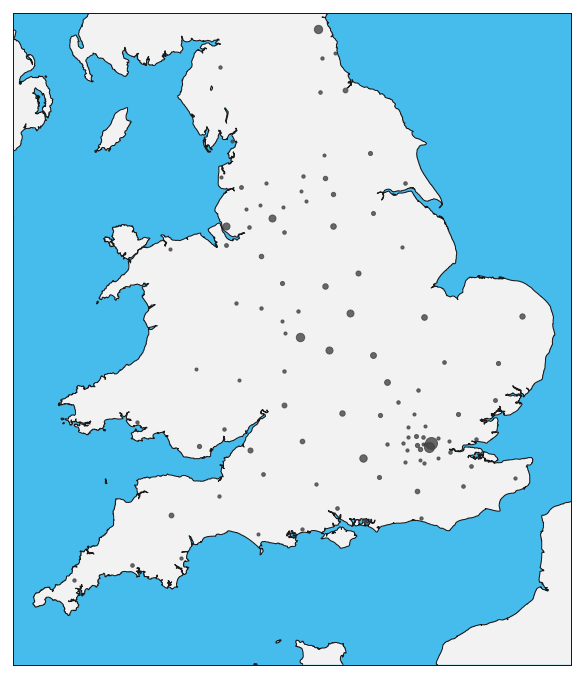

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-6., llcrnrlat= 49.5, urcrnrlon=2., urcrnrlat=55.2) 

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
    
def plot_area(pos):
    count = new_areas.loc[new_areas.pos == pos]['count']
    x, y = m(pos[1], pos[0])
    size = (count/1000) ** 2 + 3
    m.plot(x, y, 'o', markersize=size, color='#444444', alpha=0.8)
    
new_areas.pos.apply(plot_area)

m

## Map of New Build Properties by Postcode Area

Next let's draw postcode boundaries on the map and colour them depending on how many new houses in that area. The darker the colour, the more new houses in the area.

UK postcode areas from http://www.opendoorlogistics.com/downloads/

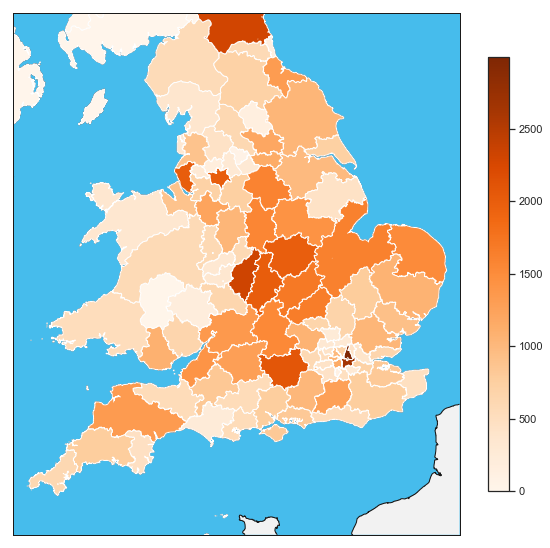

In [22]:

fig, ax = plt.subplots(figsize=(10,20))
m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc', 
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-6., llcrnrlat= 49.5,urcrnrlon=2., urcrnrlat=55.2)
             
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('data/uk-postcodes-Jan2015/Areas', 'areas')

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.areas],
        'area': [area['name'] for area in m.areas_info]
    })
df_poly = df_poly.merge(new_areas, on='area', how='left')

cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['count'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['count'])
plt.colorbar(mapper, shrink=0.4)

m

## Map of New Build Properties by Postcode District

We also identify new build properties by postal <i>district</i>. This might be useful to us as a postal district is more precise than a postal area (a postal area is made up of postal districts).

In [23]:
new = df[df.new == 1]
new_districts = pd.DataFrame(new.groupby(new.postcode.str.extract(r'([a-zA-Z\d].+ )')[0]).postcode.count())
new_districts.columns = ['count']
new_districts.index.names = ['district']
new_districts = new_districts.reset_index()
print(new_districts.shape)
new_districts.head(10)

(1765, 2)


,district,count
0,AL1,83
1,AL10,8
2,AL2,5
3,AL3,3
4,AL4,8
5,AL5,15
6,AL6,10
7,AL7,119
8,AL9,16
9,B1,39


In [24]:
def get_by_district(district, df):
    result = df[(df.postcode.str.match(district)) & (~df.lat.isnull()) & (~df.lon.isnull())]    
    return result

def get_mean_district_lat_lon(district, df):
    district_houses = get_by_district(district, df) 
    mean_lat_lon = district_houses.lat.mean(), district_houses.lon.mean()
    
    return mean_lat_lon

new_districts['pos'] = new_districts.district.apply(get_mean_district_lat_lon, args=(new,))

# Strip out any whitespace
new_districts['district'] = new_districts['district'].str.strip()


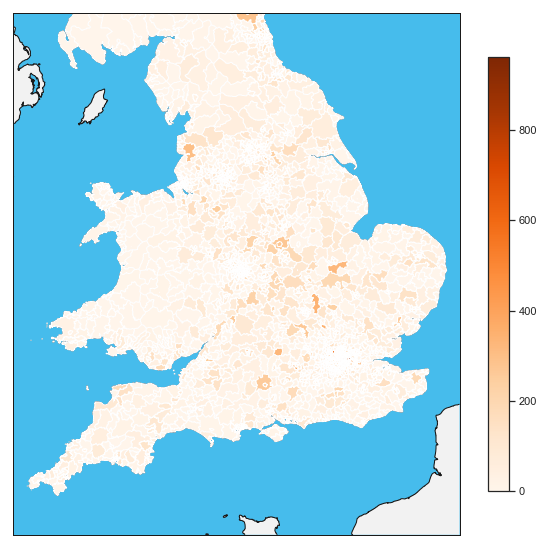

In [25]:

fig, ax = plt.subplots(figsize=(10,20))
m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc', 
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-6., llcrnrlat= 49.5,urcrnrlon=2., urcrnrlat=55.2)
             
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('data/uk-postcodes-Jan2015/Districts', 'districts')


df_poly2 = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.districts],
        'district': [district['name'] for district in m.districts_info]
    })
df_poly2 = df_poly2.merge(new_districts, on='district', how='left')

cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly2.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly2['count'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly2['count'])
plt.colorbar(mapper, shrink=0.4)

m


This map of new build properties by postcode (above) is perhaps a bit too detailed to be much use to us however it is interesting to see what level of detail we can go down to if necessary. 

## Random Dives

Let's take a random dive into say..... the sale of all flats (property type 'F') in a postcode .... 'N4 3HD'. 

In [26]:
pcode = 'N4 3HD'
ptype = 'F'
dff = df.loc[(df['postcode']==pcode) & (df['type'] == ptype)]

In [27]:
dff.shape
print('Total properties of type {0} sold in postal area {1} in 2018: {2} '.format(ptype, pcode, len(dff)))

Total properties of type F sold in postal area N4 3HD in 2018: 2 


In [28]:
dff

,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status,lat,lon
312166,408000,2018-09-28 00:00,N4 3HD,F,0,L,9A,NaN,ENNIS ROAD,NaN,LONDON,HARINGEY,GREATER LONDON,A,A,51.567912,-0.108314
312167,411000,2018-06-27 00:00,N4 3HD,F,0,L,11,NaN,ENNIS ROAD,NaN,LONDON,HARINGEY,GREATER LONDON,A,A,51.567912,-0.108314


Let's take a dive into say..... the sale of all properties in a postcode area.... 'N4 '. 

In [29]:
# All sales for a particular postal area
postal_area = 'N4 '
dff = df.loc[(df['postcode'].str.startswith(postal_area))]

In [30]:
print('Total properties sold in postal area {0} in 2018: {1} '.format(postal_area, len(dff)))

Total properties sold in postal area N4  in 2018: 668 


In [31]:
sum_total = 0
for pt in property_types:
    num = len(dff[dff.type == pt])
    sum_total += num
    print('Total properties sold in {0} of type: {1} is {2}'.format(postal_area, pt, num))
print('Total properties sold in {0} of all types: {1}'.format(postal_area, sum_total))


Total properties sold in N4  of type: O is 42
Total properties sold in N4  of type: D is 2
Total properties sold in N4  of type: F is 513
Total properties sold in N4  of type: S is 9
Total properties sold in N4  of type: T is 102
Total properties sold in N4  of all types: 668


## Top 10 postal sectors with most sales activity

This is based on <i>all</i> sales activity, not just new build properties.

In [32]:
# Top ten postal sectors with most sales activity
df_sales = df
sales_sectors = pd.DataFrame(df.groupby(df.postcode).postcode.count())
sales_sectors.columns = ['count']
sales_sectors.index.names = ['postal_sector']
sales_sectors = sales_sectors.sort_values(by=['count'], ascending=False)
sales_sectors = sales_sectors.reset_index()
sales_sectors.head(10)

,postal_sector,count
0,L5 3AA,192
1,SS2 6EB,190
2,LU1 5FT,170
3,EX34 8PF,145
4,CH1 3GW,121
5,HX1 2DG,116
6,W6 0BT,107
7,M16 0UB,103
8,E10 7JQ,103
9,E15 1DU,97


## Top 10 postal sectors with highest average sales price

This is based on <i>all</i> sales activity, not just new build properties.

In [33]:
# Top ten postal sectors with highest average sale price
df_price = df
price_sectors = pd.DataFrame(df.groupby(df.postcode).price.mean())
price_sectors.columns = ['average_price']
price_sectors.index.names = ['postal_sector']
price_sectors = price_sectors.sort_values(by=['average_price'], ascending=False)
price_sectors = price_sectors.reset_index()
price_sectors.average_price = price_sectors.average_price.astype(int)

price_sectors = price_sectors.merge(sales_sectors, on='postal_sector', how='left')
price_sectors.columns = ['postal_sector','average_price', 'num_sales']

price_sectors.head(10)


,postal_sector,average_price,num_sales
0,W1J 7BT,569200000,1
1,SE1 9JZ,448500000,1
2,NE6 1AS,448300979,1
3,WS1 1RY,415000000,2
4,SW1A 2EU,325169089,1
5,WC1B 4JB,302000000,1
6,BN1 9QA,200000000,1
7,W1F 8HX,185837186,1
8,SW1V 1HD,175000000,1
9,WR14 1BH,168076986,1


Let's take a closer look at this property sold for nearly 570 million GBP (£569,200,000) in the 'W1J 7BT' postcode.

In [34]:
df[df.postcode == 'W1J 7BT']

,price,transfer_date,postcode,type,new,duration,paon,saon,street,locality,city,district,county,ppd_cat,record_status,lat,lon
693830,569200000,2018-02-08 00:00,W1J 7BT,O,0,F,2,NaN,STANHOPE ROW,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,B,A,51.506058,-0.14925


Many of these high 'average price' by postcode figures are based on just one or two sales. Let's look again with a condition of a minimum of 5 sales within a postcode. 

In [35]:
price_sectors = price_sectors[price_sectors.num_sales >= 5]
price_sectors.head(10)

,postal_sector,average_price,num_sales
33,E14 9XP,95000000,5
157,LS6 1AJ,39887285,5
218,EX4 6JQ,30030463,8
237,HX3 0NR,27962854,5
306,SW1X 9HD,23680000,5
339,BL1 1DG,21987500,6
470,SE1 4AU,17450000,5
474,EX4 6JG,17294979,7
491,WR14 1JH,16991693,10
678,W1J 8AS,12357500,20


The data shows that 5 sales occurred with an average price of 95 million (£95,000,000) GBP each, in the 'E14 9XP' postcode location. 

## Average Prices and Sales for each property type by month

Let's plot the average price paid for each property type for each month (Jan to Dec) in 2018. We will leave out the Other ('O') property type since we are not really interested in these types of property.   

In [36]:
# In this section we are not working with postcodes and so we can return to using the original full dataset
# (See 'Warning' note above)
df = df_original

# Convert transfer_dates to datetime type we can work with.
df['transfer_date'] = pd.to_datetime(df['transfer_date'], format='%Y-%m-%d %H:%M', errors='ignore') 

In [37]:
# Confirm number of sales records.
len(df)

904147

In [38]:
# Extract all sales of flats information 

def aggregate_by_month(df, property_type):
    df_X = df[df.type == property_type]
    df_X_by_month = df_X.groupby(df_X['transfer_date'].dt.month) \
       .agg({'price':'mean', 'transfer_date':'count'}) \
       .rename(columns={'transfer_date':'num_sales', 'price':'average_price'}) \
       .reset_index()
    df_X_by_month.average_price = df_X_by_month.average_price.astype(int)
    return df_X_by_month
    

df_F_by_month = aggregate_by_month(df, 'F')    
df_D_by_month = aggregate_by_month(df, 'D')    
df_S_by_month = aggregate_by_month(df, 'S')    
df_T_by_month = aggregate_by_month(df, 'T')    
df_O_by_month = aggregate_by_month(df, 'O')    

In [39]:
df_monthly = df_F_by_month.merge(df_D_by_month, on='transfer_date').merge(df_S_by_month, on='transfer_date') \
    .merge(df_T_by_month, on='transfer_date').merge(df_O_by_month, on='transfer_date')
df_monthly.columns = ['transfer_date', 'average_price_F', 'num_sales_F', 'average_price_D', \
                      'num_sales_D', 'average_price_S', 'num_sales_S', 'average_price_T', 'num_sales_T', \
                      'average_price_O', 'num_sales_O']
df_monthly

,transfer_date,average_price_F,num_sales_F,average_price_D,num_sales_D,average_price_S,num_sales_S,average_price_T,num_sales_T,average_price_O,num_sales_O
0,1,319268,13048,412028,14933,253354,17468,238479,19236,1100417,4885
1,2,292933,14013,402116,15095,250147,18146,228415,19291,1339045,4457
2,3,296886,15090,405295,18307,245973,21269,233114,22720,1124335,5908
3,4,313805,12702,400891,15544,246610,18536,235116,19557,958828,5028
4,5,337254,14168,401556,17910,247067,20986,230395,22186,1086623,4962
5,6,307717,16094,393357,22214,249862,24837,233180,24722,1141779,5336
6,7,308394,14602,420720,19850,260504,23027,248386,23176,1193317,5139
7,8,286825,16233,415549,22569,261269,25957,250272,26098,1090669,5269
8,9,293328,12202,415117,17749,259758,20381,240869,20511,1433396,3902
9,10,278089,12367,411563,18755,252245,22281,234362,22783,931861,3917


Text(0, 0.5, 'Average Price Paid (GBP)')

<Figure size 432x288 with 0 Axes>

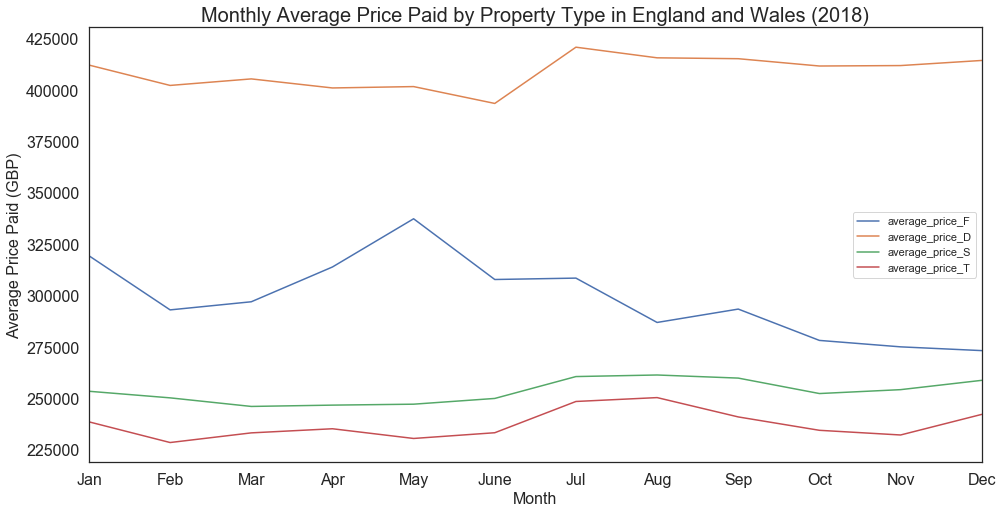

In [40]:
plt.figure()
ax = df_monthly[['average_price_F', 'average_price_D', 'average_price_S', 
            'average_price_T']].plot(
    figsize=(16, 8), 
    fontsize=16,
    )

xlabels = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_title('Monthly Average Price Paid by Property Type in England and Wales (2018)', fontsize=20)
ax.set_xlabel("Month", fontsize=16)
ax.set_xticks(np.arange(0, 12)) 
ax.set_xticklabels(xlabels)
ax.set_ylabel("Average Price Paid (GBP)", fontsize=16)

Text(0, 0.5, 'Number of Sales')

<Figure size 432x288 with 0 Axes>

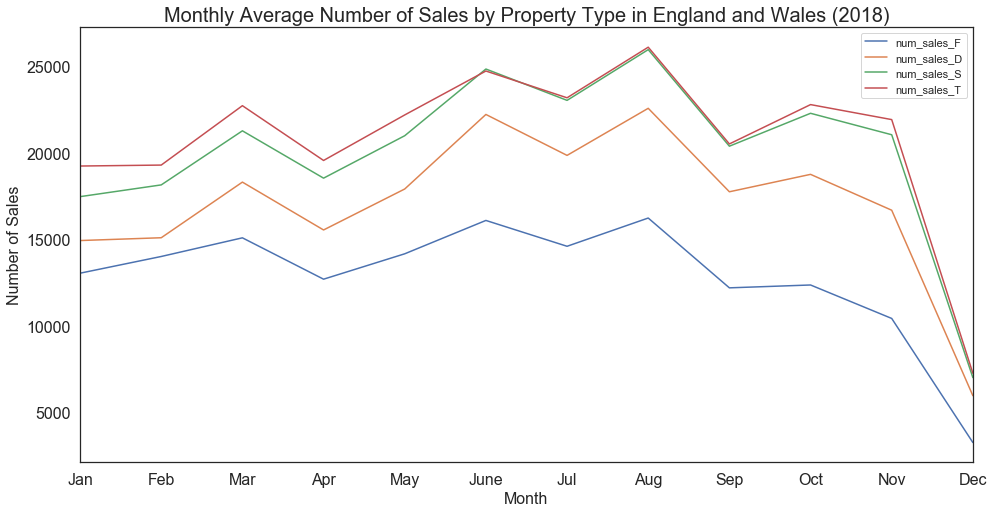

In [41]:
plt.figure()
ax = df_monthly[['num_sales_F', 'num_sales_D', 'num_sales_S', 
            'num_sales_T']].plot(
    figsize=(16, 8), 
    fontsize=16,
    )

xlabels = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_title('Monthly Average Number of Sales by Property Type in England and Wales (2018)', fontsize=20)
ax.set_xlabel("Month", fontsize=16)
ax.set_xticks(np.arange(0, 12)) 
ax.set_xticklabels(xlabels)
ax.set_ylabel("Number of Sales", fontsize=16)

### Further research

It would be interesting to download data for previous years, such as 2017, 2016, and possibly all the way back to 1995 to compare and contrast price and sales data changes over these periods of time. 